# 1. Вопросы

1) Я думаю где-то 5-6. Питона, который я знаю вполне хватает для анализа данных и визуализации, я проходил большой модуль по дата саинс там было всё нужное (различные пакеты, конструкции типа трай-ексепт, функции, алгоритмы и тд), плюс делаю свои проекты, которые лежат на гитхабе.
2) Тоже средне, около 5, знаю основные функции которые нужны для анализа, сводные таблицы и тд.

# 2. Задачи на логику

1. 4 $
2. 18 дней
3. 60 баннеров
4. Джон и Кейт
5. 88 баллов
6. 39 минут

# 3. Техническое задание

### EDA

Импортируем модули

In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Загружаем датасет

In [151]:
df = pd.read_excel('data.xlsx')

Посмотрим как выглядит таблица

In [152]:
df.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00


Изучим, что находится в колонках

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    float64
 2   status          730 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   Unnamed: 5      0 non-null      float64
 6   document        709 non-null    object 
 7   receiving_date  607 non-null    object 
dtypes: float64(3), object(5)
memory usage: 45.8+ KB


Сразу видно что колонка 'Unnamed: 5' полностью пустая, можно её спокойно удалить

In [154]:
df = df.drop(columns=['Unnamed: 5'])

В клонке 'client_id' 6 пропусков, которые присутствуют и в последующих колонках, их удаляем тоже

In [155]:
df = df.dropna(subset=['client_id'])

Проверяем следующую колонку, в ней всё в порядке

In [156]:
df['status'].unique()

array(['ВНУТРЕННИЙ', 'ОПЛАЧЕНО', 'ПРОСРОЧЕНО', 'В РАБОТЕ',
       'НА ПОДПИСАНИИ'], dtype=object)

В колонке 'sale' всего 12 иникальных значений, одно из которых ошибка в виде '-', которая встречается и в следующих колонках, избавимся от неё

In [157]:
df['sale'].nunique()

12

In [158]:
df['sale'].value_counts()

sale
Петрова       169
Смирнов       122
Андреев       103
Кузнецова      96
Иванов         73
Филимонова     64
Васильев       46
Соколов        23
Селиванов      21
Михайлов        5
-               1
Попов           1
Name: count, dtype: int64

In [159]:
df['sale'] = df['sale'].replace('-', np.nan)
df['new/current'] = df['new/current'].replace('-', np.nan)
df['document'] = df['document'].replace('-', np.nan)
df['receiving_date'] = df['receiving_date'].replace('-', np.nan)

Теперь из недочётов остались только пропуски:

In [160]:
df.isna().sum()

client_id           0
sum                 0
status              0
sale                1
new/current         1
document           16
receiving_date    118
dtype: int64

Однако эти пропуски уже не являются ошибками и несут за собой некий смысл

С остальными колонками мы разобрались, теперь таблица выглядит так и готова для работы:

In [161]:
df

,client_id,sum,status,sale,new/current,document,receiving_date
1,6.0,11693.7,ВНУТРЕННИЙ,NaN,NaN,NaN,NaT
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07
...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaT
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaT
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08


### 1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.

In [162]:
result1 = (df[(df['status'] != 'ПРОСРОЧЕНО') & (df['receiving_date'].dt.strftime('%Y-%m') == '2021-07')]
       .groupby(df['receiving_date'].dt.strftime('%Y-%m'))['sum'].sum().reset_index())

In [163]:
result1

,receiving_date,sum
0,2021-07,757830.74


### 2) Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.

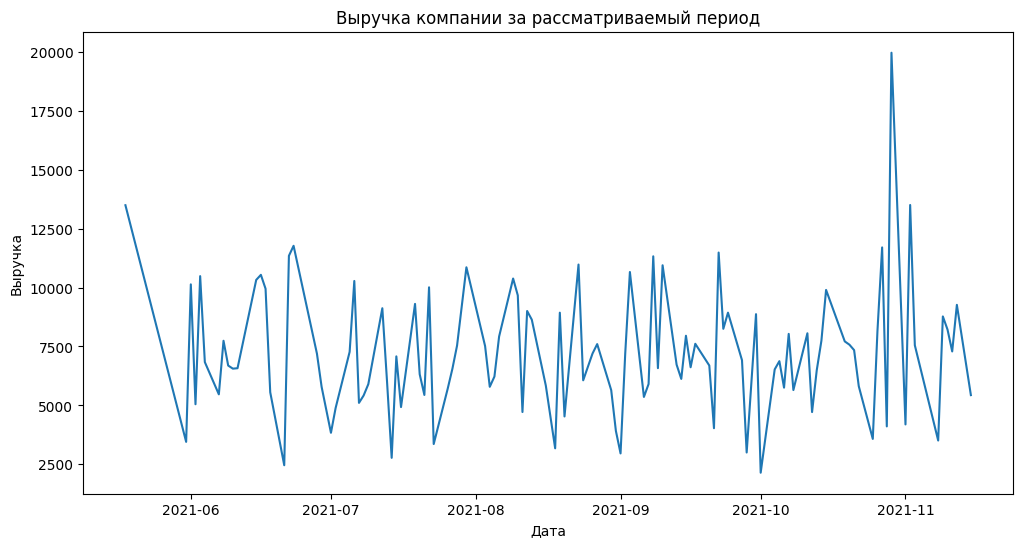

In [164]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['receiving_date'], y=df['sum'], ci=None)
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Выручка компании за рассматриваемый период')
plt.show()

### 3) Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

In [165]:
result3 = (df[(df['receiving_date'].dt.strftime('%Y-%m') == '2021-09')]
       .groupby('sale')['sum'].sum().reset_index()
       .sort_values('sum', ascending=False).head(1))

In [166]:
result3

,sale,sum
4,Петрова,219240.12


### 4) Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [167]:
result4 = (df[(df['receiving_date'].dt.strftime('%Y-%m') == '2021-10')]['new/current'].value_counts().reset_index())

In [168]:
result4

,new/current,count
0,текущая,105
1,новая,17


### 5) Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [169]:
may_transactions = df[(df['receiving_date'].dt.year == 2021) & (df['receiving_date'].dt.month == 5)]
june_received_transactions = may_transactions[(may_transactions['receiving_date'].dt.year == 2021) 
                                              & (may_transactions['receiving_date'].dt.month == 6)]
num_original_contracts = len(june_received_transactions)
num_original_contracts

0

In [170]:
result5 = (df[(df['receiving_date'].dt.strftime('%Y-%m') == '2021-05')])

In [171]:
result5

,client_id,sum,status,sale,new/current,document,receiving_date
50,94.0,31094.2,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-05-18
51,95.0,4688.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-05-18
127,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-05-31
178,95.0,4688.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-05-18


Тут либо я не понял формулировки вопроса, либо как видно из таблицы выше, незавершенных в плане документов сделок в мае не было

# Задание:  
За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом.

1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус
оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).

2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс.,
и 3 % от суммы, если меньше. При этом статус оплаты может быть любым,
кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом месяце).

Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого
месяца, считаются остатком на следующий период, который выплачивается по мере
прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.

In [172]:
df

,client_id,sum,status,sale,new/current,document,receiving_date
1,6.0,11693.7,ВНУТРЕННИЙ,NaN,NaN,NaN,NaT
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07
...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaT
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaT
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08


Создадим колонку с процентами, которые получают менеджеры за сделки при учёте ксловий 1 и 2

In [173]:
df['percent'] = 0
df.loc[(df['new/current'] == 'новая') & (df['status'] == 'ОПЛАЧЕНО') & (df['document'] == 'оригинал'), 'percent'] = 7
df.loc[(df['new/current'] == 'текущая') & (df['status'] != 'ПРОСРОЧЕНО') & (df['document'] == 'оригинал') & (df['sum'] >= 10000), 'percent'] = 5
df.loc[(df['new/current'] == 'текущая') & (df['status'] != 'ПРОСРОЧЕНО') & (df['document'] == 'оригинал') & (df['sum'] < 10000), 'percent'] = 3


Теперь таблица выглядит следующим образом

In [174]:
df

,client_id,sum,status,sale,new/current,document,receiving_date,percent
1,6.0,11693.7,ВНУТРЕННИЙ,NaN,NaN,NaN,NaT,0
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,7
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,5
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,3
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,3
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15,3
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaT,0
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaT,0
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08,7


Если я правильно понял условие, нам нужно найти менеджеров которые не подходят под наши условия 1 и 2 до 01.07.2021

In [175]:
ans = (df[(df['receiving_date'].dt.strftime('%Y-%m') == '2021-06')]
       .groupby(['sale', 'percent'])['sum'].sum().reset_index())

In [176]:
ans

,sale,percent,sum
0,Андреев,3,18942.09
1,Андреев,5,24991.40
2,Андреев,7,16347.70
3,Васильев,3,10132.40
4,Васильев,7,503.70
5,Иванов,3,18417.80
6,Иванов,5,39026.10
7,Кузнецова,3,72684.65
8,Кузнецова,7,6059.03
9,Петрова,3,83818.10


В итоге к 01.07.2021 таких менеджеров только один

In [177]:
ans[ans['percent'] == 0]

,sale,percent,sum
13,Смирнов,0,9948.7
